In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
test_data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\\test_train_split_after_outlier\test.csv')
test_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,16.1,15.7,97.5,2.8,171,1006.12,31.3,1.11,0,0.0,...,6.6,78.2,10.9,0.6,0.4,0.0,Canada,49.8400,-71.17000,398.2
1,22.5,18.1,75.0,11.1,200,1008.90,19.4,2.70,0,0.0,...,9.6,196.9,17.1,0.9,0.7,0.0,Canada,48.6100,-86.29000,191.5
2,0.9,-1.9,81.8,3.1,338,1012.74,12.5,0.70,0,0.0,...,27.4,428.5,47.3,0.6,1.0,0.0,Canada,50.6700,-113.35000,965.0
3,19.9,1.1,28.0,7.9,56,1020.90,23.7,0.00,1,0.0,...,126.2,270.2,125.9,8.1,30.1,11.3,Canada,49.4675,-120.51190,700.0
4,9.6,8.9,95.5,7.4,100,1021.30,14.6,12.60,0,0.0,...,0.1,1.4,0.1,0.0,0.0,0.0,Canada,49.0200,-122.78000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162765,15.0,10.0,72.0,4.0,225,1026.12,40.0,0.00,6,0.0,...,28.7,317.6,46.8,2.9,8.2,1.1,United Kingdom,56.4170,-5.46700,31.0
162766,16.0,15.0,93.8,5.6,340,1020.30,12.9,0.20,0,0.0,...,1.6,158.4,3.1,0.6,0.2,0.0,Canada,50.6850,-127.37583,17.4
162767,19.3,2.4,32.0,7.4,180,1017.70,24.4,0.00,1,0.0,...,89.7,297.9,102.3,5.9,22.1,6.5,Canada,61.3200,-117.60000,161.5
162768,3.4,-1.9,68.0,19.1,53,1018.25,15.7,0.00,3,0.0,...,44.3,494.1,72.4,5.2,16.8,4.0,Canada,49.8700,-111.38000,799.0


In [3]:
test_data = test_data.iloc[:20000]       
test_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,16.1,15.7,97.5,2.8,171,1006.12,31.3,1.11,0,0.0,...,6.6,78.2,10.9,0.6,0.4,0.0,Canada,49.8400,-71.1700,398.2
1,22.5,18.1,75.0,11.1,200,1008.90,19.4,2.70,0,0.0,...,9.6,196.9,17.1,0.9,0.7,0.0,Canada,48.6100,-86.2900,191.5
2,0.9,-1.9,81.8,3.1,338,1012.74,12.5,0.70,0,0.0,...,27.4,428.5,47.3,0.6,1.0,0.0,Canada,50.6700,-113.3500,965.0
3,19.9,1.1,28.0,7.9,56,1020.90,23.7,0.00,1,0.0,...,126.2,270.2,125.9,8.1,30.1,11.3,Canada,49.4675,-120.5119,700.0
4,9.6,8.9,95.5,7.4,100,1021.30,14.6,12.60,0,0.0,...,0.1,1.4,0.1,0.0,0.0,0.0,Canada,49.0200,-122.7800,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18.6,14.5,77.0,14.9,1,1012.30,14.5,0.00,2,0.0,...,17.4,202.8,28.7,1.6,3.2,0.2,Canada,42.9950,-82.3075,181.0
19996,21.9,13.9,60.0,14.5,344,1008.40,28.5,6.90,0,0.0,...,16.4,219.7,27.7,1.1,1.9,0.1,Canada,47.8058,-69.5486,147.0
19997,16.7,-1.9,30.1,32.5,252,1009.99,33.7,0.00,1,0.0,...,86.3,488.4,119.7,27.5,64.6,43.5,Canada,49.3300,-113.5200,1074.0
19998,21.5,16.4,72.8,38.9,300,1009.20,21.2,0.00,4,0.0,...,9.4,292.8,17.3,11.9,15.0,3.3,Canada,50.5000,-98.0400,249.6


In [4]:
test_data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'wind_direction', 'atmospheric_pressure', 'visibility',
       'precipitation', 'rain_days', 'snow_on_ground',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index',
       'daily_severity_rating', 'country', 'latitude', 'longitude',
       'elevation'],
      dtype='object')

In [5]:
test_data = test_data.drop(['wind_direction','snow_on_ground','daily_severity_rating','latitude','longitude', 'elevation','visibility'], axis = 1)
test_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,16.1,15.7,97.5,2.8,1006.12,1.11,0,64.1,6.6,78.2,10.9,0.6,0.4,Canada
1,22.5,18.1,75.0,11.1,1008.90,2.70,0,64.0,9.6,196.9,17.1,0.9,0.7,Canada
2,0.9,-1.9,81.8,3.1,1012.74,0.70,0,65.1,27.4,428.5,47.3,0.6,1.0,Canada
3,19.9,1.1,28.0,7.9,1020.90,0.00,1,91.6,126.2,270.2,125.9,8.1,30.1,Canada
4,9.6,8.9,95.5,7.4,1021.30,12.60,0,14.1,0.1,1.4,0.1,0.0,0.0,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18.6,14.5,77.0,14.9,1012.30,0.00,2,74.8,17.4,202.8,28.7,1.6,3.2,Canada
19996,21.9,13.9,60.0,14.5,1008.40,6.90,0,66.1,16.4,219.7,27.7,1.1,1.9,Canada
19997,16.7,-1.9,30.1,32.5,1009.99,0.00,1,91.5,86.3,488.4,119.7,27.5,64.6,Canada
19998,21.5,16.4,72.8,38.9,1009.20,0.00,4,83.3,9.4,292.8,17.3,11.9,15.0,Canada


In [6]:
# Load saved PowerTransformer dictionary
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\power_transformers.pkl', 'rb') as f:
    power_transformers = pickle.load(f)

# Load saved StandardScaler
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\standard_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load saved OneHotEncoding
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\one_hot_encoder.pkl', 'rb') as f:
    ohe = pickle.load(f)
    
# Load saved LR_Model
with open(r'E:\Info_Srping\FWI_Prediction\models\LR5_PKL\linear_regression_model.pkl', 'rb') as f:
    LR_model = pickle.load(f)

In [7]:
col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']
for col, pt in power_transformers.items():
    # Transform test column using fitted transformer
    transformed = pt.transform(test_data[col].values.reshape(-1, 1))
    test_data[col + '_transformed'] = transformed.flatten()


In [8]:
test_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,16.1,15.7,97.5,2.8,1006.12,1.11,0,64.1,6.6,78.2,...,0.6,0.4,Canada,74325.447991,2.312484,11.686683,3.159915,0.461329,0.336525,1.608573
1,22.5,18.1,75.0,11.1,1008.90,2.70,0,64.0,9.6,196.9,...,0.9,0.7,Canada,73989.766979,2.751837,17.874492,3.857626,0.625749,0.530759,3.562617
2,0.9,-1.9,81.8,3.1,1012.74,0.70,0,65.1,27.4,428.5,...,0.6,1.0,Canada,77737.728269,4.167419,25.170839,5.724440,0.461329,0.693370,1.718828
3,19.9,1.1,28.0,7.9,1020.90,0.00,1,91.6,126.2,270.2,...,8.1,30.1,Canada,209769.009689,6.690270,20.575548,7.933677,2.025253,3.442682,2.983255
4,9.6,8.9,95.5,7.4,1021.30,12.60,0,14.1,0.1,1.4,...,0.0,0.0,Canada,1005.489865,0.095888,1.045642,0.096176,-0.000000,0.000000,2.879488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18.6,14.5,77.0,14.9,1012.30,0.00,2,74.8,17.4,202.8,...,1.6,3.2,Canada,116342.250666,3.522162,18.112370,4.756187,0.920113,1.436038,4.119893
19996,21.9,13.9,60.0,14.5,1008.40,6.90,0,66.1,16.4,219.7,...,1.1,1.9,Canada,81251.882619,3.441636,18.771494,4.691294,0.720475,1.065236,4.066142
19997,16.7,-1.9,30.1,32.5,1009.99,0.00,1,91.5,86.3,488.4,...,27.5,64.6,Canada,209102.675649,6.011191,26.635030,7.808909,2.940836,4.191687,5.868146
19998,21.5,16.4,72.8,38.9,1009.20,0.00,4,83.3,9.4,292.8,...,11.9,15.0,Canada,159093.645324,2.726181,21.316854,3.876664,2.313983,2.776150,6.332020


In [9]:
numeric_cols = test_data.select_dtypes(include=['float64', 'int']).columns
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

In [10]:
test_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,-0.121991,1.153260,1.924302,-1.427372,-1.291030,-0.196021,-0.597480,-0.524276,-0.673227,-0.810617,...,-0.735420,-0.761063,Canada,-0.892892,-0.695503,-0.744606,-0.651905,-1.072740,-1.177581,-2.024259
1,0.751900,1.499636,0.821115,-0.459324,-0.874863,0.050760,-0.597480,-0.529397,-0.561814,-0.206614,...,-0.685199,-0.738198,Canada,-0.897942,-0.407068,0.064538,-0.295780,-0.862828,-1.018498,-0.310250
2,-2.197483,-1.386834,1.154522,-1.392382,-0.300014,-0.259657,-0.597480,-0.473068,0.099234,0.971879,...,-0.735420,-0.715334,Canada,-0.841552,0.522260,1.018639,0.657077,-1.072740,-0.885315,-1.927548
3,0.396882,-0.953864,-1.483321,-0.832547,0.921541,-0.368303,-0.342095,0.883935,3.768426,0.166372,...,0.520112,1.502525,Canada,1.144920,2.178507,0.417739,1.784713,0.923887,1.366451,-0.818443
4,-1.009537,0.171860,1.826241,-0.890863,0.981421,1.587325,-0.597480,-3.084659,-0.914621,-1.201413,...,-0.835863,-0.791549,Canada,-1.996025,-2.150696,-2.136074,-2.215695,-1.661708,-1.453204,-0.909463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.219373,0.980071,0.919176,-0.016122,-0.365882,-0.368303,-0.086709,0.023646,-0.272141,-0.176592,...,-0.568016,-0.547661,Canada,-0.260729,0.098649,0.095644,0.162862,-0.487021,-0.277048,0.178571
19996,0.669973,0.893477,0.085656,-0.062774,-0.949713,0.702636,-0.597480,-0.421861,-0.309279,-0.090596,...,-0.651718,-0.646740,Canada,-0.788680,0.045784,0.181833,0.129740,-0.741894,-0.580746,0.131422
19997,-0.040064,-1.386834,-1.380357,2.036606,-0.711690,-0.368303,-0.342095,0.878814,2.286637,1.276680,...,3.767754,4.131946,Canada,1.134895,1.732693,1.210103,1.721029,2.092791,1.979908,1.712069
19998,0.615355,1.254286,0.713247,2.783052,-0.829953,-0.368303,0.424063,0.458911,-0.569242,0.281372,...,1.156248,0.351677,Canada,0.382485,-0.423912,0.514675,-0.286063,1.292502,0.820542,2.118961


In [11]:
test_data = test_data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [12]:
test_data['FFMC__TEMP'] = test_data['temperature'] * test_data['fine_fuel_moisture_code_transformed']
test_data['FFMC_RH'] = test_data['relative_humidity'] * test_data['fine_fuel_moisture_code_transformed']
test_data['RH_TEMP'] = test_data['temperature'] * test_data['relative_humidity']
test_data['RD_FFMC'] =  test_data['fine_fuel_moisture_code_transformed'] * test_data['rain_days']
test_data['DC_RD'] =  test_data['drought_code_transformed'] * test_data['rain_days']
test_data['WS_TENP'] =  test_data['wind_speed_transformed'] * test_data['fine_fuel_moisture_code_transformed']
test_data['IST_WS'] =  test_data['wind_speed_transformed'] * test_data['initial_spread_index_transformed']
test_data['ISI_FFMC'] =  test_data['initial_spread_index_transformed'] * test_data['fine_fuel_moisture_code_transformed']
test_data['ISI_RH'] =  test_data['initial_spread_index_transformed'] * test_data['relative_humidity']
test_data['DMC_TEMP'] =  test_data['duff_moisture_code_transformed'] * test_data['temperature']
test_data['DMC_RD'] =  test_data['duff_moisture_code_transformed'] * test_data['rain_days']
test_data['RD_TEMP'] =  test_data['rain_days'] * test_data['temperature']
test_data['DMC_DC'] =  test_data['drought_code_transformed'] * test_data['duff_moisture_code_transformed']
test_data['BUI_DC'] =  test_data['drought_code_transformed'] * test_data['build_up_index_transformed']
test_data['BUI_DMC'] =  test_data['duff_moisture_code_transformed'] * test_data['build_up_index_transformed']

C:\Users\DELL\AppData\Local\Temp\ipykernel_15340\3843077778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FFMC__TEMP'] = test_data['temperature'] * test_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_15340\3843077778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FFMC_RH'] = test_data['relative_humidity'] * test_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_15340\3843077778.py:3: SettingWithCopy

In [13]:
test_data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,...,WS_TENP,IST_WS,ISI_FFMC,ISI_RH,DMC_TEMP,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC
0,-0.121991,1.153260,1.924302,-1.291030,-0.196021,-0.597480,Canada,-0.892892,-0.695503,-0.744606,...,1.807444,2.171503,0.957840,-2.064274,0.084845,0.415550,0.072887,0.517876,0.485412,0.453402
1,0.751900,1.499636,0.821115,-0.874863,0.050760,-0.597480,Canada,-0.897942,-0.407068,0.064538,...,0.278586,0.267692,0.774770,-0.708481,-0.306075,0.243215,-0.449246,-0.026271,-0.019089,0.120403
2,-2.197483,-1.386834,1.154522,-0.300014,-0.259657,-0.597480,Canada,-0.841552,0.522260,1.018639,...,1.622133,2.067757,0.902766,-1.238502,-1.147657,-0.312040,1.312953,0.531994,0.669324,0.343165
3,0.396882,-0.953864,-1.483321,0.921541,-0.368303,-0.342095,Canada,1.144920,2.178507,0.417739,...,-0.937051,-0.756148,1.057776,-1.370421,0.864610,-0.745255,-0.135771,0.910048,0.745545,3.888011
4,-1.009537,0.171860,1.826241,0.981421,1.587325,-0.597480,Canada,-1.996025,-2.150696,-2.136074,...,1.815311,1.511262,3.316810,-3.034678,2.171207,1.284998,0.603179,4.594044,4.732888,4.765285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.219373,0.980071,0.919176,-0.365882,-0.368303,-0.086709,Canada,-0.260729,0.098649,0.095644,...,-0.046559,-0.086968,0.126981,-0.447658,0.021641,-0.008554,-0.019022,0.009435,0.015577,0.016066
19996,0.669973,0.893477,0.085656,-0.949713,0.702636,-0.597480,Canada,-0.788680,0.045784,0.181833,...,-0.103650,-0.097501,0.585117,-0.063548,0.030674,-0.027355,-0.400296,0.008325,0.023591,0.005940
19997,-0.040064,-1.386834,-1.380357,-0.711690,-0.368303,-0.342095,Canada,1.134895,1.732693,1.210103,...,1.943018,3.583003,2.375097,-2.888798,-0.069419,-0.592745,0.013706,2.096737,2.082622,2.982016
19998,0.615355,1.254286,0.713247,-0.829953,-0.368303,0.424063,Canada,0.382485,-0.423912,0.514675,...,0.810472,2.738761,0.494363,0.921874,-0.260856,-0.179765,0.260949,-0.218177,-0.147229,0.121265


In [14]:
test_data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'atmospheric_pressure', 'precipitation', 'rain_days', 'country',
       'fine_fuel_moisture_code_transformed', 'duff_moisture_code_transformed',
       'drought_code_transformed', 'build_up_index_transformed',
       'initial_spread_index_transformed', 'fire_weather_index_transformed',
       'wind_speed_transformed', 'FFMC__TEMP', 'FFMC_RH', 'RH_TEMP', 'RD_FFMC',
       'DC_RD', 'WS_TENP', 'IST_WS', 'ISI_FFMC', 'ISI_RH', 'DMC_TEMP',
       'DMC_RD', 'RD_TEMP', 'DMC_DC', 'BUI_DC', 'BUI_DMC'],
      dtype='object')

In [15]:
encoded_array = ohe.transform(test_data[['country']])  
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['country']))
new_data_encoded = pd.concat([test_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [16]:
new_data_encoded = new_data_encoded.drop(['country'], axis =1)
new_data_encoded

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,...,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,-0.121991,1.153260,1.924302,-1.291030,-0.196021,-0.597480,-0.892892,-0.695503,-0.744606,-0.651905,...,0.415550,0.072887,0.517876,0.485412,0.453402,1,0,0,0,0
1,0.751900,1.499636,0.821115,-0.874863,0.050760,-0.597480,-0.897942,-0.407068,0.064538,-0.295780,...,0.243215,-0.449246,-0.026271,-0.019089,0.120403,1,0,0,0,0
2,-2.197483,-1.386834,1.154522,-0.300014,-0.259657,-0.597480,-0.841552,0.522260,1.018639,0.657077,...,-0.312040,1.312953,0.531994,0.669324,0.343165,1,0,0,0,0
3,0.396882,-0.953864,-1.483321,0.921541,-0.368303,-0.342095,1.144920,2.178507,0.417739,1.784713,...,-0.745255,-0.135771,0.910048,0.745545,3.888011,1,0,0,0,0
4,-1.009537,0.171860,1.826241,0.981421,1.587325,-0.597480,-1.996025,-2.150696,-2.136074,-2.215695,...,1.284998,0.603179,4.594044,4.732888,4.765285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.219373,0.980071,0.919176,-0.365882,-0.368303,-0.086709,-0.260729,0.098649,0.095644,0.162862,...,-0.008554,-0.019022,0.009435,0.015577,0.016066,1,0,0,0,0
19996,0.669973,0.893477,0.085656,-0.949713,0.702636,-0.597480,-0.788680,0.045784,0.181833,0.129740,...,-0.027355,-0.400296,0.008325,0.023591,0.005940,1,0,0,0,0
19997,-0.040064,-1.386834,-1.380357,-0.711690,-0.368303,-0.342095,1.134895,1.732693,1.210103,1.721029,...,-0.592745,0.013706,2.096737,2.082622,2.982016,1,0,0,0,0
19998,0.615355,1.254286,0.713247,-0.829953,-0.368303,0.424063,0.382485,-0.423912,0.514675,-0.286063,...,-0.179765,0.260949,-0.218177,-0.147229,0.121265,1,0,0,0,0


In [17]:
new_data_encoded['ISI_Squared'] = new_data_encoded['initial_spread_index_transformed'] ** 2
new_data_encoded['BUI_Squared']   = new_data_encoded['build_up_index_transformed'] ** 2
new_data_encoded['DMC_Squared']   = new_data_encoded['duff_moisture_code_transformed'] ** 2

In [18]:
# Prepare features and target from your new test data
X = new_data_encoded.drop('fire_weather_index_transformed', axis = 1)
y = new_data_encoded['fire_weather_index_transformed']

In [19]:
# Predict on the features
y_test_pred = LR_model.predict(X)

# Evaluate if target is available
if y is not None:
    from sklearn.metrics import r2_score, mean_squared_error
    print('Test R²:', r2_score(y, y_test_pred))
    print('Test MSE:', mean_squared_error(y, y_test_pred))


Test R²: 0.9836756645868353
Test MSE: 0.01637780090573188


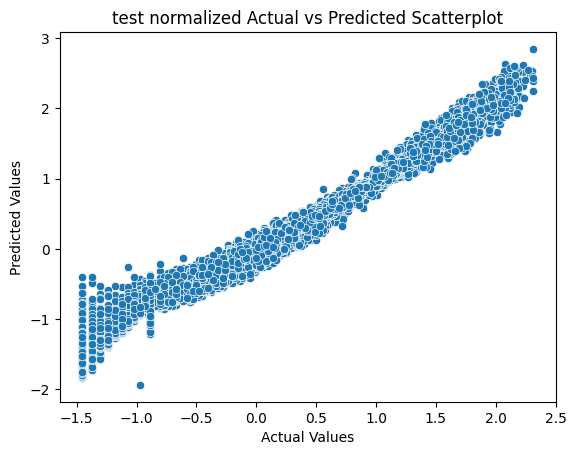

In [20]:
sns.scatterplot(x=y, y=y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('test normalized Actual vs Predicted Scatterplot')
plt.savefig('test_normalized+Act_vs_pred.png')
plt.show()


In [21]:
# number of features scaler was trained on
n_features = len(scaler.mean_)  

# index of target column inside scaler
col_index = list(scaler.feature_names_in_).index('fire_weather_index_transformed')

def inverse_single_column(scaler, values, col_index):
    """
    Inverse transform only one column of a StandardScaler.
    values: (n_samples,) array in scaled space for target column
    col_index: index of target column inside scaler.feature_names_in_
    """
    # create dummy matrix with correct number of features
    dummy = np.zeros((len(values), n_features))
    dummy[:, col_index] = values  # put values only in target column
    
    # inverse transform all features
    inv = scaler.inverse_transform(dummy)
    
    # extract only target column (now back in power-transform space)
    return inv[:, col_index]

In [22]:
# Step 1: inverse StandardScaler
y_train_pred_power = inverse_single_column(scaler, y_test_pred, col_index)
y_train_power = inverse_single_column(scaler, y, col_index)

# Step 2: inverse PowerTransformer
pt = power_transformers['fire_weather_index']
y_train_pred_orig = pt.inverse_transform(y_train_pred_power.reshape(-1, 1)).ravel()
y_train_orig = pt.inverse_transform(y_train_power.reshape(-1, 1)).ravel()

# Step 3: evaluate metrics
from sklearn.metrics import r2_score, mean_squared_error

train_r2_orig = r2_score(y_train_orig, y_train_pred_orig)
train_mse_orig = mean_squared_error(y_train_orig, y_train_pred_orig)

print('Original scale R²:', train_r2_orig)
print('Original scale MSE:', train_mse_orig)

Original scale R²: 0.9424513396983949
Original scale MSE: 10.02266861424822


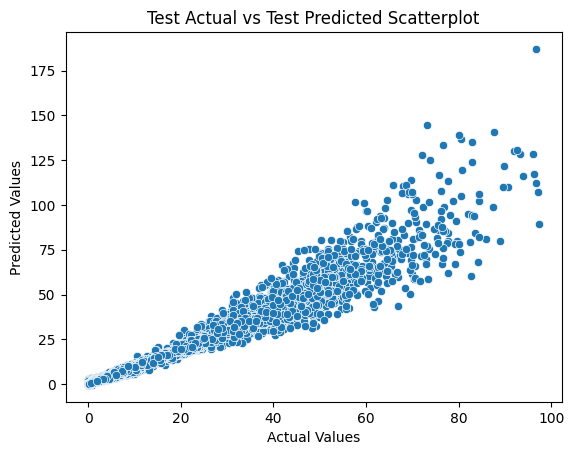

In [23]:
sns.scatterplot(x=y_train_orig, y=y_train_pred_orig)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Actual vs Test Predicted Scatterplot')
plt.savefig('Act_vs_pred_test.png')
plt.savefig("test_data.png")
plt.show()


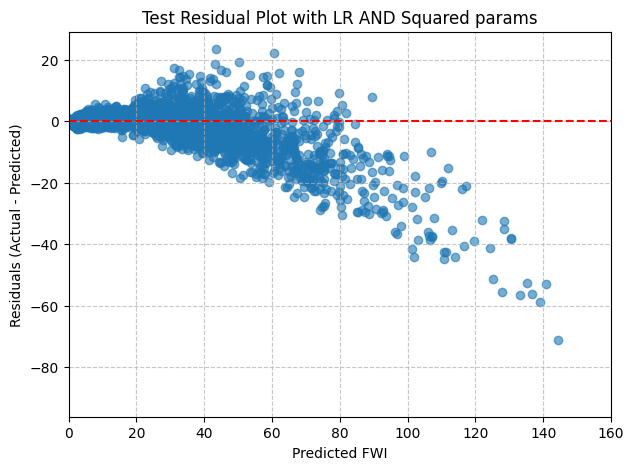

In [30]:
# Compute residuals
train_residuals = y_train_orig - y_train_pred_orig

# Train residual plot
plt.figure(figsize=(7,5))
plt.scatter(y_train_pred_orig, train_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FWI")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Test Residual Plot with LR AND Squared params")
# Set y-axis limits
plt.xlim(0, 160)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Test_Residual_Plot.png")

plt.show()
